In [1]:
# Importing libraries and reading .csv file
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_train = pd.read_csv('earnings_train.csv')
df_test = pd.read_csv('earnings_test_features.csv')
print(df_train.columns)
df_train

Index(['DISTRICT_TYPE', 'DISTRICT_NAME', 'DISTRICT_CODE', 'ACADEMIC_YEAR',
       'DEMO_CATEGORY', 'STUDENT_POPULATION', 'AWARD_CATEGORY', 'WAGE_YEAR1',
       'WAGE_YEAR2', 'WAGE_YEAR3', 'WAGE_YEAR4'],
      dtype='object')


,DISTRICT_TYPE,DISTRICT_NAME,DISTRICT_CODE,ACADEMIC_YEAR,DEMO_CATEGORY,STUDENT_POPULATION,AWARD_CATEGORY,WAGE_YEAR1,WAGE_YEAR2,WAGE_YEAR3,WAGE_YEAR4
0,School District,Duarte Unified,1964469.0,2018-2019,Race,None Reported,Bachelor's Degree - Did Not Transfer,0.0,0.0,0.0,0.0
1,School District,Coronado Unified,3768031.0,2018-2019,Race,None Reported,Associate Degree,0.0,0.0,0.0,0.0
2,School District,Gilroy Unified,4369484.0,2018-2019,Race,Black or African American,Bachelor's Degree - Did Not Transfer,0.0,0.0,0.0,0.0
3,School District,Pleasant Valley,5672553.0,2018-2019,Homeless Status,Did Not Experience Homelessness in K-12,Community College Certificate,0.0,0.0,0.0,0.0
4,Legislative District,Senate District 15,NaN,2018-2019,Race,American Indian or Alaska Native,Community College Certificate,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
20700,School District,Armona Union Elementary,1663875.0,2018-2019,Race,American Indian or Alaska Native,Associate Degree,0.0,0.0,0.0,0.0
20701,School District,Taft Union High,1563818.0,2018-2019,Race,White,Community College Certificate,0.0,0.0,0.0,0.0
20702,School District,Bassett Unified,1964295.0,2018-2019,Foster Status,Foster Youth,Bachelor's Degree - Did Not Transfer,0.0,0.0,0.0,0.0
20703,School District,SBE - John Henry High,777354.0,2018-2019,Gender,Male,Bachelor's Degree - Did Not Transfer,0.0,0.0,0.0,0.0


In [2]:
# Question 1
for col in df_train.columns:
    print(f"Column {col} has type {df_train[col].dtype}, contains {df_train[col].isnull().sum()} empty cells")

print(f"{df_train.dropna().shape[0]} of {df_train.shape[0]} lines is complete")



Column DISTRICT_TYPE has type object, contains 0 empty cells
Column DISTRICT_NAME has type object, contains 0 empty cells
Column DISTRICT_CODE has type float64, contains 2745 empty cells
Column ACADEMIC_YEAR has type object, contains 0 empty cells
Column DEMO_CATEGORY has type object, contains 0 empty cells
Column STUDENT_POPULATION has type object, contains 0 empty cells
Column AWARD_CATEGORY has type object, contains 0 empty cells
Column WAGE_YEAR1 has type float64, contains 0 empty cells
Column WAGE_YEAR2 has type float64, contains 0 empty cells
Column WAGE_YEAR3 has type float64, contains 0 empty cells
Column WAGE_YEAR4 has type float64, contains 0 empty cells
17960 of 20705 lines is complete


In [3]:
# Question 2 Unique values
for col in ['DISTRICT_TYPE', 'DISTRICT_NAME', 'DISTRICT_CODE', 'ACADEMIC_YEAR',
            'DEMO_CATEGORY', 'STUDENT_POPULATION', 'AWARD_CATEGORY', 'WAGE_YEAR1',
            'WAGE_YEAR2', 'WAGE_YEAR3', 'WAGE_YEAR4']:
    pass

for col in ['DISTRICT_TYPE', 'DISTRICT_NAME', 'DISTRICT_CODE', 'ACADEMIC_YEAR',
            'DEMO_CATEGORY', 'STUDENT_POPULATION', 'AWARD_CATEGORY', ]:
    unique_values = df_train[col].unique()
    print(f"Column: {col}")
    MAX_PRINTED = 30
    if len(unique_values) <= MAX_PRINTED:
        for i in sorted(list(unique_values)):
            print(f"    {i}")
    else:
        for i in sorted(list(unique_values))[:MAX_PRINTED]:
            print(f"    {i}")
        print(f"    [{len(unique_values) - MAX_PRINTED} more unique values...]")

for col in ['WAGE_YEAR1', 'WAGE_YEAR2', 'WAGE_YEAR3', 'WAGE_YEAR4']:
    pass





Column: DISTRICT_TYPE
    All
    Legislative District
    School District
Column: DISTRICT_NAME
    ABC Unified
    Acalanes Union High
    Acton-Agua Dulce Unified
    Adelanto Elementary
    Alameda County Office of Education
    Alameda Unified
    Albany City Unified
    Alhambra Unified
    All
    Alpaugh Unified
    Alpine County Office of Education
    Alta Vista Elementary
    Alvord Unified
    Amador County Office of Education
    Amador County Unified
    Anaheim Union High
    Anderson Union High
    Anderson Valley Unified
    Antelope Valley Union High
    Antioch Unified
    Apple Valley Unified
    Arcadia Unified
    Arcata Elementary
    Arena Union Elementary
    Armona Union Elementary
    Aromas - San Juan Unified
    Assembly District 1
    Assembly District 10
    Assembly District 11
    Assembly District 12
    [662 more unique values...]
Column: DISTRICT_CODE
    110017.0
    161143.0
    161168.0
    161200.0
    161259.0
    175101.0
    461432.0
    66162

In [4]:
# Question 2 Ranges
df_train[['WAGE_YEAR1', 'WAGE_YEAR2', 'WAGE_YEAR3', 'WAGE_YEAR4']].describe()


,WAGE_YEAR1,WAGE_YEAR2,WAGE_YEAR3,WAGE_YEAR4
count,20705.000000,20705.000000,20705.000000,20705.000000
mean,4476.106834,6075.533253,7310.831635,8530.890413
std,11944.502346,16140.916903,19158.203471,22106.663179
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,97993.000000,132847.000000,146728.000000,153910.000000


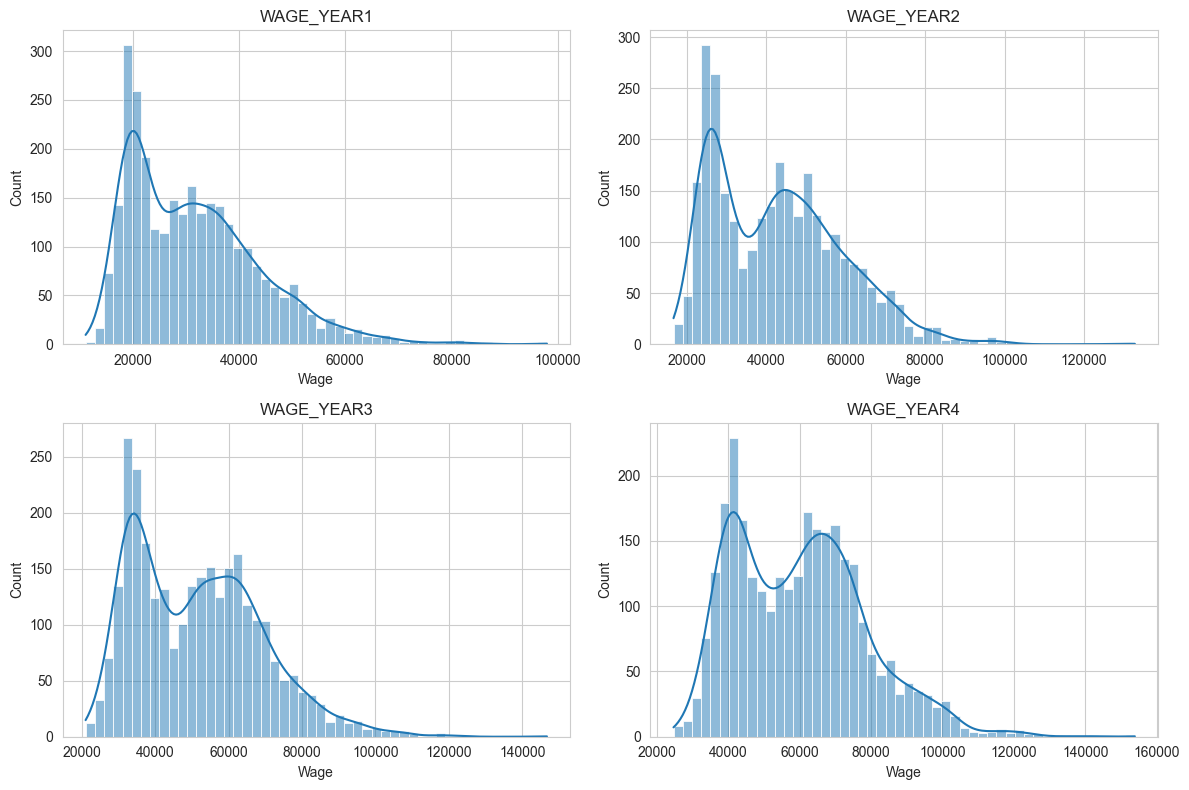

,DISTRICT_TYPE,DISTRICT_NAME,DISTRICT_CODE,ACADEMIC_YEAR,DEMO_CATEGORY,STUDENT_POPULATION,AWARD_CATEGORY,WAGE_YEAR1,WAGE_YEAR2,WAGE_YEAR3,WAGE_YEAR4
6,Legislative District,Assembly District 56,NaN,2018-2019,All,All,Community College Certificate,24039.0,25210.0,24293.0,28562.0
12,School District,Liberty Union High,761721.0,2018-2019,Homeless Status,Did Not Experience Homelessness in K-12,Bachelor's Degree - Did Not Transfer,39340.0,56250.0,66698.0,70569.0
21,School District,Campbell Union High,4369401.0,2018-2019,All,All,Bachelor's Degree - Did Not Transfer,46988.0,71062.0,84356.0,90041.0
41,Legislative District,Assembly District 10,NaN,2018-2019,Homeless Status,Did Not Experience Homelessness in K-12,Bachelor's Degree - Transferred,29448.0,52323.0,64539.0,71298.0
54,School District,Los Alamitos Unified,3073924.0,2018-2019,Homeless Status,Did Not Experience Homelessness in K-12,Associate Degree,15495.0,27094.0,24070.0,52649.0
...,...,...,...,...,...,...,...,...,...,...,...
20663,School District,Walnut Valley Unified,1973460.0,2018-2019,All,All,Associate Degree,16991.0,25339.0,26844.0,46519.0
20673,Legislative District,Assembly District 22,NaN,2018-2019,Foster Status,Not Foster Youth,Associate Degree,21305.0,26815.0,34758.0,40457.0
20678,Legislative District,Assembly District 20,NaN,2018-2019,Race,Asian,Bachelor's Degree - Did Not Transfer,52247.0,65054.0,77501.0,86712.0
20683,Legislative District,Senate District 15,NaN,2018-2019,Gender,Female,Community College Certificate,21872.0,37426.0,42437.0,45981.0


In [5]:
# Question 2 Normal distribution
cols = [f"WAGE_YEAR{x}" for x in range(1, 5)]
df_filtered = df_train.loc[~(df_train[cols] == 0).all(axis=1)]

plt.figure(figsize=(12, 8))

for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_filtered[col], kde=True, bins=50)
    plt.title(col)
    plt.xlabel('Wage')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

df_filtered



In [6]:
# Question 4
df_train[df_train['WAGE_YEAR3'] != 0].groupby('STUDENT_POPULATION')['WAGE_YEAR3'].mean().sort_values(ascending=True)

STUDENT_POPULATION
None Reported                                41322.500000
Experienced Homelessness in K-12             42112.333333
Black or African American                    44192.200000
American Indian or Alaska Native             45065.500000
Hispanic or Latino                           45435.139932
Female                                       46855.705463
Native Hawaiian or Other Pacific Islander    48271.500000
All                                          48612.764881
Not Foster Youth                             50611.966587
Foster Youth                                 53781.000000
Did Not Experience Homelessness in K-12      53783.877119
White                                        56343.733607
Two or More Races                            57575.666667
Male                                         59291.457421
Asian                                        61497.252874
Name: WAGE_YEAR3, dtype: float64

In [7]:
# Question 4
df_train.groupby('STUDENT_POPULATION')['WAGE_YEAR3'].mean().sort_values(ascending=True)

STUDENT_POPULATION
None Reported                                   42.887909
American Indian or Alaska Native                49.171304
Native Hawaiian or Other Pacific Islander       53.338674
Foster Youth                                    61.852789
Two or More Races                              336.699805
Black or African American                      446.686658
Experienced Homelessness in K-12               944.094429
Asian                                         7799.214286
Hispanic or Latino                           12535.306968
White                                        12624.307622
Did Not Experience Homelessness in K-12      15183.008373
Female                                       17612.725000
Male                                         20810.238258
Not Foster Youth                             20893.018719
All                                          26430.241100
Name: WAGE_YEAR3, dtype: float64

In [8]:
# Question 5
print(df_train[
          (df_train['WAGE_YEAR3'] < df_train['WAGE_YEAR2']) |
          (df_train['WAGE_YEAR2'] < df_train['WAGE_YEAR1'])
          ]['STUDENT_POPULATION'].value_counts())

STUDENT_POPULATION
All                                        46
Not Foster Youth                           36
Male                                       34
Did Not Experience Homelessness in K-12    16
Female                                     15
White                                      11
Hispanic or Latino                          9
Asian                                       6
Experienced Homelessness in K-12            4
Black or African American                   2
Two or More Races                           1
Name: count, dtype: int64


In [9]:
# Question 6
print(df_train[
          (df_train['WAGE_YEAR3'] > df_train['WAGE_YEAR2']) |
          (df_train['WAGE_YEAR2'] > df_train['WAGE_YEAR1'])
          ]['STUDENT_POPULATION'].value_counts())

STUDENT_POPULATION
All                                          671
Female                                       421
Not Foster Youth                             419
Male                                         410
Hispanic or Latino                           293
White                                        244
Did Not Experience Homelessness in K-12      236
Asian                                        174
Experienced Homelessness in K-12              33
Black or African American                     15
Two or More Races                              9
Foster Youth                                   2
None Reported                                  2
Native Hawaiian or Other Pacific Islander      2
American Indian or Alaska Native               2
Name: count, dtype: int64


In [16]:
# Part 2

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

df_test = pd.read_csv("earnings_test_features.csv")
df_train = pd.read_csv("earnings_train.csv")

# Prepare 2 additional column of average wage year 4 for each DEMO_CATEGORY and AWARD_CATEGORY
avg_demo = df_train.groupby('DEMO_CATEGORY')['WAGE_YEAR4'].mean().rename('AVG_WAGE_YEAR4_DEMO_CATEGORY')
avg_award = df_train.groupby('AWARD_CATEGORY')['WAGE_YEAR4'].mean().rename('AVG_WAGE_YEAR4_AWARD_CATEGORY')
df_train = df_train.merge(avg_demo, on='DEMO_CATEGORY', how='left')
df_train = df_train.merge(avg_award, on='AWARD_CATEGORY', how='left')
df_test = df_test.merge(avg_demo, on='DEMO_CATEGORY', how='left')
df_test = df_test.merge(avg_award, on='AWARD_CATEGORY', how='left')

# Prepare another 1 additional column of roughly interpolated wage year 4
def local_extrapolate(row):
    xs = np.array([1.0, 2.0, 3.0])
    ys = np.array([row.get('WAGE_YEAR1'),
                   row.get('WAGE_YEAR2'),
                   row.get('WAGE_YEAR3')], dtype=float)

    a, k = np.polyfit(xs, ys, 1)
    pred4 = a * 4.0 + k
    return pred4

df_train['LOCAL_PRED_WAGE_YEAR4'] = df_train.apply(local_extrapolate, axis=1)
df_test['LOCAL_PRED_WAGE_YEAR4'] = df_test.apply(local_extrapolate, axis=1)

features = [
    'WAGE_YEAR1', 'WAGE_YEAR2', 'WAGE_YEAR3',
    'AVG_WAGE_YEAR4_DEMO_CATEGORY', 'AVG_WAGE_YEAR4_AWARD_CATEGORY',
    'LOCAL_PRED_WAGE_YEAR4'
]
target = 'WAGE_YEAR4'


x_train, x_validation, y_train, y_validation = train_test_split(df_train[features], df_train[target], test_size=0.1)

model = LinearRegression()
model.fit(x_train, y_train)
print(model.coef_)

y_validation_pred = model.predict(x_validation)
print(f'Validation RMSE: {np.sqrt(mean_squared_error(y_validation, y_validation_pred))}')

df_test['WAGE_YEAR4'] = model.predict(df_test[features])

df_test[['WAGE_YEAR4']].to_csv('preds.csv', index=False)
print("Done")


[ 0.34763932 -0.05926759  0.492651    0.02747512 -0.00831278  0.40535259]
Validation RMSE: 2338.695438261013
Done
